<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Split-into-Training-and-Test-Data" data-toc-modified-id="Split-into-Training-and-Test-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Split into Training and Test Data</a></span><ul class="toc-item"><li><span><a href="#Solving-nan" data-toc-modified-id="Solving-nan-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Solving nan</a></span></li></ul></li><li><span><a href="#Implement-ML-Algorithms" data-toc-modified-id="Implement-ML-Algorithms-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Implement ML Algorithms</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Neural-Network-Regression" data-toc-modified-id="Neural-Network-Regression-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Neural Network Regression</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Lasso</a></span></li><li><span><a href="#ElasticNet" data-toc-modified-id="ElasticNet-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>ElasticNet</a></span></li><li><span><a href="#Decision-Forest-Regression" data-toc-modified-id="Decision-Forest-Regression-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Decision Forest Regression</a></span></li><li><span><a href="#Extra-Trees-Regression" data-toc-modified-id="Extra-Trees-Regression-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Extra Trees Regression</a></span></li><li><span><a href="#Decision-Tree-+-AdaBoost" data-toc-modified-id="Decision-Tree-+-AdaBoost-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Decision Tree + AdaBoost</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>XGBoost</a></span></li></ul></li></ul></li><li><span><a href="#Evaluate-Models" data-toc-modified-id="Evaluate-Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Evaluate Models</a></span><ul class="toc-item"><li><span><a href="#Predict" data-toc-modified-id="Predict-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Predict</a></span></li></ul></li><li><span><a href="#LSTM" data-toc-modified-id="LSTM-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LSTM</a></span></li><li><span><a href="#Predict-Weather" data-toc-modified-id="Predict-Weather-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Predict Weather</a></span></li></ul></div>

In [2]:
# Import relevant items
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline


# Split into Training and Test Data

Cross validation is always desired when training machine learning models to be able to trust the generality of the model created. We will split our data into training and test data using Scikit learn's built in tools. Also for scikit learn we need to separate our dataset into inputs and the feature being predicted (or X's and y's).

In [3]:
df = pd.read_csv('train.csv')
small=['date_2','hour','dayname','weekend','day_period','pm25','pm25_week_ago','pm25_two_week_ago']
df=df[small]


ls = []

df['date_2']=pd.to_datetime(df.date_2)
df['month']=df.date_2.dt.month
df['week']=df.date_2.dt.week
df.drop('date_2',axis=1,inplace=True)

df['dayname']=df.dayname.replace({'Monday':'0', 'Tuesday':'1', 'Wednesday':'2', 'Thursday':'3', 'Friday':'4', 'Saturday':'5',
                                 'Sunday':'6'})

df['dayname']=df.dayname.astype('int')
df['day_period'] = df.day_period.replace({'evening':'0','morning':'1','noon':'2','night':'3'})
df['day_period']=df.day_period.astype('int')
df['month']=df.month.astype('int')

In [4]:
df.head()

,hour,dayname,weekend,day_period,pm25,pm25_week_ago,pm25_two_week_ago,month,week
0,0,2,False,0,32.70,NaN,NaN,5,21
1,1,2,False,0,29.00,NaN,NaN,5,21
2,2,2,False,0,27.55,NaN,NaN,5,21
3,3,2,False,0,24.83,NaN,NaN,5,21
4,4,2,False,1,21.60,NaN,NaN,5,21


In [5]:
#one week again
one_week_ago=df[['hour','dayname','week','pm25']].copy()
one_week_ago.week=one_week_ago.week+1
one_week_ago=one_week_ago.set_index(['dayname','hour','week'])
one_week_ago.columns=['one_week_ago']

df=df.set_index(['dayname','hour','week']).join(one_week_ago)
df.drop('pm25_week_ago',axis=1,inplace=True)
df=df.rename(columns={'one_week_ago': 'pm25_week_ago'})
df.reset_index(inplace=True)

In [6]:
df.head()

,dayname,hour,week,weekend,day_period,pm25,pm25_two_week_ago,month,pm25_week_ago
0,2,0,21,False,0,32.70,NaN,5,NaN
1,2,1,21,False,0,29.00,NaN,5,NaN
2,2,2,21,False,0,27.55,NaN,5,NaN
3,2,3,21,False,0,24.83,NaN,5,NaN
4,2,4,21,False,1,21.60,NaN,5,NaN


In [7]:

#two week again
two_week_ago=df[['hour','dayname','week','pm25']].copy()
two_week_ago.week=two_week_ago.week+2
two_week_ago=two_week_ago.set_index(['dayname','hour','week'])
two_week_ago.columns=['two_week_ago']
df.reset_index(inplace=True)
df=df.set_index(['dayname','hour','week']).join(two_week_ago)
df.drop('pm25_two_week_ago',axis=1,inplace=True)


In [8]:
df=df.rename(columns={'two_week_ago': 'pm25_two_week_ago'})

In [9]:
df.head()

index  weekend  day_period   pm25  month  pm25_week_ago  \
dayname hour week                                                            
2       0    21        0    False           0  32.70      5            NaN   
        1    21        1    False           0  29.00      5            NaN   
        2    21        2    False           0  27.55      5            NaN   
        3    21        3    False           0  24.83      5            NaN   
        4    21        4    False           1  21.60      5            NaN   

                   pm25_two_week_ago  
dayname hour week                     
2       0    21                  NaN  
        1    21                  NaN  
        2    21                  NaN  
        3    21                  NaN  
        4    21                  NaN

## Solving nan

In [10]:
df.head()

index  weekend  day_period   pm25  month  pm25_week_ago  \
dayname hour week                                                            
2       0    21        0    False           0  32.70      5            NaN   
        1    21        1    False           0  29.00      5            NaN   
        2    21        2    False           0  27.55      5            NaN   
        3    21        3    False           0  24.83      5            NaN   
        4    21        4    False           1  21.60      5            NaN   

                   pm25_two_week_ago  
dayname hour week                     
2       0    21                  NaN  
        1    21                  NaN  
        2    21                  NaN  
        3    21                  NaN  
        4    21                  NaN

In [11]:
week_ago=df.groupby(['dayname','hour']).agg({'pm25':'mean'})
week_ago.columns=['missing_pm25']
df.reset_index(inplace=True)
df=df.set_index(['dayname','hour']).join(week_ago)
df['pm25_week_ago']=np.select([df.pm25_week_ago.isnull()], [df.missing_pm25], default=df.pm25_week_ago)
df['pm25_two_week_ago']=np.select([df.pm25_two_week_ago.isnull()], [df.missing_pm25], default=df.pm25_two_week_ago)

In [12]:
imp_col=['dayname', 'hour', 'weekend', 'day_period', 'pm25', 'pm25_week_ago',
       'pm25_two_week_ago', 'month', 'week', 'missing_pm25']

In [13]:
df=df.reset_index()
df.head()

,dayname,hour,week,index,weekend,day_period,pm25,month,pm25_week_ago,pm25_two_week_ago,missing_pm25
0,0,0,22,111,False,0,15.13,5,12.670,12.670,12.670
1,0,0,24,360,False,0,14.82,6,12.670,15.130,12.670
2,0,0,25,524,False,0,4.78,6,14.820,12.670,12.670
3,0,0,26,692,False,0,15.95,6,4.780,14.820,12.670
4,0,1,22,112,False,0,15.53,5,10.602,10.602,10.602


In [14]:
df['x']=df.week*7+df.dayname
df['trend']=df.x**2*(7*10**-5)-0.0621*df.x+24.772

In [15]:
y = df['pm25']
X = df.drop(['pm25','missing_pm25','index'], axis=1)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [17]:
X_train.shape, y_train.shape

((602, 10), (602,))

In [18]:
X_test.shape, y_test.shape

((258, 10), (258,))

# Implement ML Algorithms

Algorithms to test:

**Classification**
- Multiclass neural network
- Multiclass logistic regression
- Random Forest
- Decision Tree

## Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = LinearRegression()

In [20]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Make predictions using the testing set
lin_pred = regr.predict(X_test)

In [22]:
linear_regression_score = regr.score(X_test, y_test)
linear_regression_score

0.2941727548865405

In [23]:
from math import sqrt
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

Coefficients: 
 [-4.72569105e-02  2.67970503e-01  4.26913143e+00  1.79076565e+00
  4.75168300e-01  1.28494938e+01  2.21852519e-01  1.45660709e-01
  2.98366631e+01  7.99286405e+02]
Root mean squared error: 6.99
Mean absolute error: 5.51
R-squared: 0.29


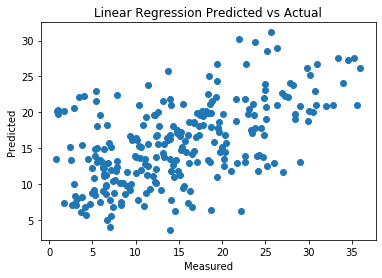

In [24]:
import matplotlib.pyplot as plt

plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

### Neural Network Regression

In [25]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor()

In [26]:
# Train the model using the training sets
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [27]:
# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
neural_network_regression_score

0.15942472168376776

In [28]:
# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

In [29]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

Root mean squared error: 7.63
Mean absolute error: 6.01
R-squared: 0.16


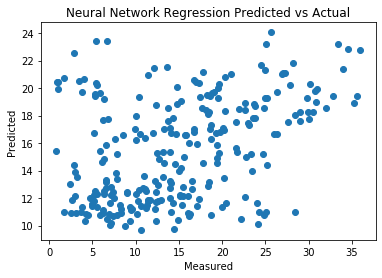

In [30]:
plt.scatter(y_test, nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()

### Lasso

In [31]:
from sklearn.linear_model import Lasso

lasso = Lasso()

In [32]:
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
# Score the model
lasso_score = lasso.score(X_test, y_test)
lasso_score

0.17364298774098186

In [34]:
# Make predictions using the testing set
lasso_pred = lasso.predict(X_test)

In [35]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))

Root mean squared error: 7.56


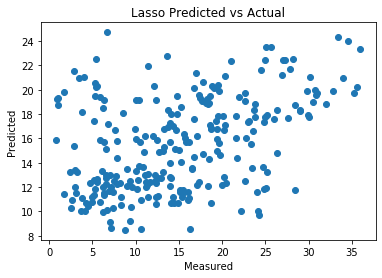

In [36]:
plt.scatter(y_test, lasso_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Predicted vs Actual')
plt.show()

### ElasticNet

In [37]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()

In [38]:
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
elasticnet_score = elasticnet.score(X_test, y_test)
elasticnet_score

0.17497608916073937

In [40]:
elasticnet_pred = elasticnet.predict(X_test)

In [41]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))

Root mean squared error: 7.56


### Decision Forest Regression

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

In [43]:
# Train the model using the training sets
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=1234,
                      verbose=0, warm_start=False)

In [44]:
# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
decision_forest_score

0.7100576666912646

In [45]:
# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

In [46]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

Root mean squared error: 4.48
Mean absolute error: 3.26
R-squared: 0.71


In [47]:
X.columns

Index(['dayname', 'hour', 'week', 'weekend', 'day_period', 'month',
       'pm25_week_ago', 'pm25_two_week_ago', 'x', 'trend'],
      dtype='object')

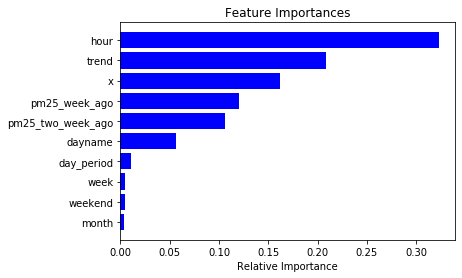

In [48]:
features = X.columns
importances = regr_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

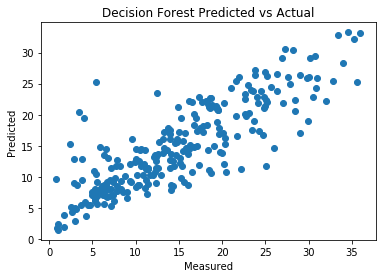

In [49]:
plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
plt.show()

### Extra Trees Regression

In [50]:
from sklearn.ensemble import ExtraTreesRegressor

extra_tree = ExtraTreesRegressor(n_estimators=200, random_state=1234)

In [51]:
extra_tree.fit(X_train, y_train)
extratree_score = extra_tree.score(X_test, y_test)
extratree_score

0.7639978450303125

In [52]:
extratree_pred = extra_tree.predict(X_test)

In [53]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))

Root mean squared error: 4.04


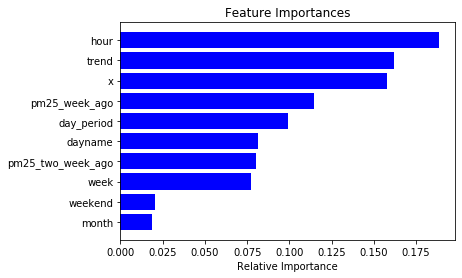

In [54]:
features = X.columns
importances = extra_tree.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

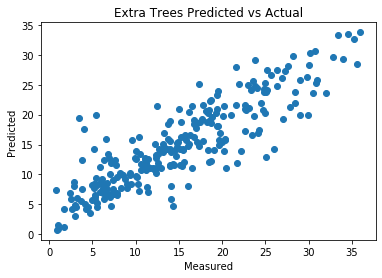

In [55]:
plt.scatter(y_test, extratree_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Extra Trees Predicted vs Actual')
plt.show()

### Decision Tree + AdaBoost

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Decision Tree Regressor object
tree_1 = DecisionTreeRegressor()

tree_2 = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=200, learning_rate=.1)

In [57]:
# Train the model using the training sets
tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=0.1, loss='linear', n_estimators=200,
                  rand

In [58]:
# Score the decision tree model
tree_1.score(X_test, y_test)

0.5169321860606024

In [59]:
# Score the boosted decision tree model
boosted_tree_score = tree_2.score(X_test, y_test)
boosted_tree_score

0.6446196757881202

In [60]:
# Make predictions using the testing set
tree_1_pred = tree_1.predict(X_test)
tree_2_pred = tree_2.predict(X_test)

In [61]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, tree_2_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, tree_2_pred))

Coefficients: 
 [-4.72569105e-02  2.67970503e-01  4.26913143e+00  1.79076565e+00
  4.75168300e-01  1.28494938e+01  2.21852519e-01  1.45660709e-01
  2.98366631e+01  7.99286405e+02]
Root mean squared error: 4.96
Mean absolute error: 3.23
R-squared: 0.64


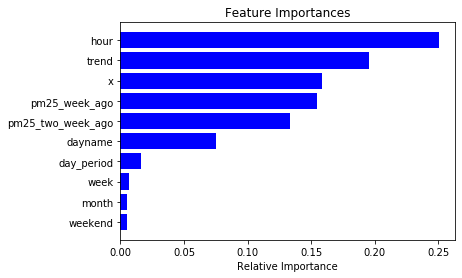

In [62]:
features = X.columns
importances = tree_2.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

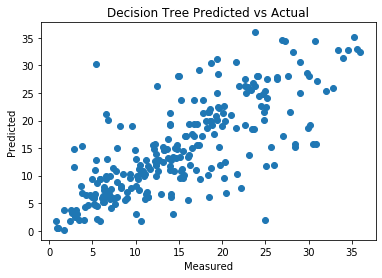

In [63]:
plt.scatter(y_test, tree_1_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Tree Predicted vs Actual')
plt.show()

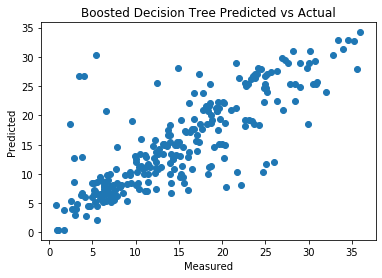

In [64]:
plt.scatter(y_test, tree_2_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Boosted Decision Tree Predicted vs Actual')
plt.show()

### XGBoost

In [65]:
from xgboost.sklearn import XGBRegressor

#Fitting XGB regressor 
xboost = XGBRegressor(n_estimators=200)

In [66]:
X_train.dtypes

dayname                int64
hour                   int64
week                   int64
weekend                 bool
day_period             int32
month                  int32
pm25_week_ago        float64
pm25_two_week_ago    float64
x                      int64
trend                float64
dtype: object

In [67]:
X_train.head()

,dayname,hour,week,weekend,day_period,month,pm25_week_ago,pm25_two_week_ago,x,trend
652,5,12,23,True,2,6,16.43,16.430,166,16.39232
753,6,5,23,True,1,6,13.82,6.360,167,16.35353
167,1,11,24,False,2,6,12.44,15.500,169,16.27637
452,3,20,24,False,3,6,0.92,18.466,171,16.19977
467,3,23,24,False,0,6,5.50,18.032,171,16.19977


In [68]:
X_train.columns

Index(['dayname', 'hour', 'week', 'weekend', 'day_period', 'month',
       'pm25_week_ago', 'pm25_two_week_ago', 'x', 'trend'],
      dtype='object')

In [69]:
X_train['day_period']=X_train.day_period.astype('int')
X_train['month']=X_train.month.astype('int')

C:\Users\danma\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\danma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
X_train.dtypes

dayname                int64
hour                   int64
week                   int64
weekend                 bool
day_period             int32
month                  int32
pm25_week_ago        float64
pm25_two_week_ago    float64
x                      int64
trend                float64
dtype: object

In [71]:
xboost.fit(X_train, y_train)

C:\Users\danma\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:29:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [72]:
X_test['day_period']=X_test.day_period.astype('int')
X_test['month']=X_test.month.astype('int')

C:\Users\danma\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\danma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
xgb_score = xboost.score(X_test, y_test)
xgb_score

0.7280852364537784

In [74]:
#Predict 
xboost_pred = xboost.predict(X_test)

In [75]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))

Root mean squared error: 4.34


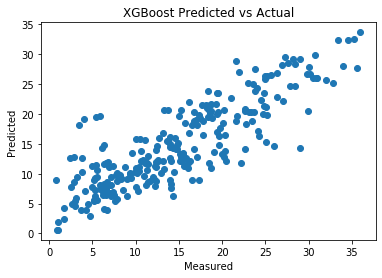

In [76]:
plt.scatter(y_test, xboost_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('XGBoost Predicted vs Actual')
plt.show()

# Evaluate Models

In [77]:
print("Scores:")
print("Linear regression score: ", linear_regression_score)
print("Neural network regression score: ", neural_network_regression_score)
print("Lasso regression score: ", lasso_score)
print("ElasticNet regression score: ", elasticnet_score)
print("Decision forest score: ", decision_forest_score)
print("Extra Trees score: ", extratree_score)
print("Boosted decision tree score: ", boosted_tree_score)
#print("XGBoost score:", xgb_score)
print("\n")
print("RMSE:")
print("Linear regression RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
print("Neural network RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
print("Lasso RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))
print("ElasticNet RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))
print("Decision forest RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
print("Extra Trees RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))
print("Boosted decision tree RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))
#print("XGBoost RMSE: %.2f"
#      % sqrt(mean_squared_error(y_test, xboost_pred)))

Scores:
Linear regression score:  0.2941727548865405
Neural network regression score:  0.15942472168376776
Lasso regression score:  0.17364298774098186
ElasticNet regression score:  0.17497608916073937
Decision forest score:  0.7100576666912646
Extra Trees score:  0.7639978450303125
Boosted decision tree score:  0.6446196757881202


RMSE:
Linear regression RMSE: 6.99
Neural network RMSE: 7.63
Lasso RMSE: 7.56
ElasticNet RMSE: 7.56
Decision forest RMSE: 4.48
Extra Trees RMSE: 4.04
Boosted decision tree RMSE: 4.96


In [78]:
X_train.columns

Index(['dayname', 'hour', 'week', 'weekend', 'day_period', 'month',
       'pm25_week_ago', 'pm25_two_week_ago', 'x', 'trend'],
      dtype='object')

In [79]:
X_test

,dayname,hour,week,weekend,day_period,month,pm25_week_ago,pm25_two_week_ago,x,trend
444,3,18,26,False,3,6,20.110,7.000,185,15.67925
146,1,7,23,False,1,6,8.350,9.936,162,16.54888
122,1,2,24,False,0,6,24.200,7.320,169,16.27637
226,2,1,24,False,0,6,28.690,16.312,170,16.23800
322,2,19,24,False,3,6,18.600,17.000,170,16.23800
...,...,...,...,...,...,...,...,...,...,...
305,2,16,23,False,3,6,17.422,24.000,163,16.50953
153,1,8,25,False,1,6,6.700,19.330,176,16.01072
828,6,18,21,True,3,5,18.474,18.474,153,16.90933
412,3,12,24,False,2,6,5.920,14.514,171,16.19977


## Predict

In [80]:
pdf=pd.read_csv('predict.csv')

In [81]:
pdf.head()

,Unnamed: 0,date,hour,dayname,weekend,day_period,pm25_week_ago,pm25_two_week_ago
0,0,2019-07-01,0,Monday,False,evening,15.95,29.00
1,1,2019-07-01,1,Monday,False,evening,10.63,30.45
2,2,2019-07-01,2,Monday,False,evening,5.33,32.34
3,3,2019-07-01,3,Monday,False,evening,3.68,33.94
4,4,2019-07-01,4,Monday,False,morning,2.53,35.27


In [82]:
small=['date_2','hour','dayname','weekend','day_period','pm25','pm25_week_ago','pm25_two_week_ago']

ls = []


pdf['date_2']=pd.to_datetime(pdf.date)
pdf['month']=pdf.date_2.dt.month
pdf['week']=pdf.date_2.dt.week
pdf.drop(['date_2','date'],axis=1,inplace=True)

pdf['dayname']=pdf.dayname.replace({'Monday':'0', 'Tuesday':'1', 'Wednesday':'2', 'Thursday':'3', 'Friday':'4', 'Saturday':'5',
                                 'Sunday':'6'})

pdf['dayname']=pdf.dayname.astype('int')
pdf['day_period'] = pdf.day_period.replace({'evening':'0','morning':'1','noon':'2','night':'3'})
pdf['day_period']=pdf.day_period.astype('int')
pdf['month']=pdf.month.astype('int')

pdf['x']=pdf.week*7+df.dayname
pdf['trend']=pdf.x**2*(7*10**-5)-0.0621*pdf.x+24.772

In [83]:
pdf.head()

,Unnamed: 0,hour,dayname,weekend,day_period,pm25_week_ago,pm25_two_week_ago,month,week,x,trend
0,0,0,0,False,0,15.95,29.00,7,27,189.0,15.53557
1,1,1,0,False,0,10.63,30.45,7,27,189.0,15.53557
2,2,2,0,False,0,5.33,32.34,7,27,189.0,15.53557
3,3,3,0,False,0,3.68,33.94,7,27,189.0,15.53557
4,4,4,0,False,1,2.53,35.27,7,27,189.0,15.53557


In [84]:
X.head()

,dayname,hour,week,weekend,day_period,month,pm25_week_ago,pm25_two_week_ago,x,trend
0,0,0,22,False,0,5,12.670,12.670,154,16.86872
1,0,0,24,False,0,6,12.670,15.130,168,16.31488
2,0,0,25,False,0,6,14.820,12.670,175,16.04825
3,0,0,26,False,0,6,4.780,14.820,182,15.78848
4,0,1,22,False,0,5,10.602,10.602,154,16.86872


In [85]:
X_predict=pdf[X.columns.tolist()]

In [86]:
from sklearn.ensemble import ExtraTreesRegressor

extra_tree = ExtraTreesRegressor(n_estimators=200, random_state=1234)
extra_tree.fit(X, y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
                    oob_score=False, random_state=1234, verbose=0,
                    warm_start=False)

In [87]:
X_predict.head()

,dayname,hour,week,weekend,day_period,month,pm25_week_ago,pm25_two_week_ago,x,trend
0,0,0,27,False,0,7,15.95,29.00,189.0,15.53557
1,0,1,27,False,0,7,10.63,30.45,189.0,15.53557
2,0,2,27,False,0,7,5.33,32.34,189.0,15.53557
3,0,3,27,False,0,7,3.68,33.94,189.0,15.53557
4,0,4,27,False,1,7,2.53,35.27,189.0,15.53557


In [88]:
extratree_pred = extra_tree.predict(X_predict)

In [89]:
pdf['predict']=extratree_pred

In [90]:
pdf.to_csv('2b_res.csv')

In [91]:
pdf

,Unnamed: 0,hour,dayname,weekend,day_period,pm25_week_ago,pm25_two_week_ago,month,week,x,trend,predict
0,0,0,0,False,0,15.95,29.00,7,27,189.0,15.53557,20.04070
1,1,1,0,False,0,10.63,30.45,7,27,189.0,15.53557,20.47570
2,2,2,0,False,0,5.33,32.34,7,27,189.0,15.53557,18.57145
3,3,3,0,False,0,3.68,33.94,7,27,189.0,15.53557,17.34800
4,4,4,0,False,1,2.53,35.27,7,27,189.0,15.53557,13.94215
...,...,...,...,...,...,...,...,...,...,...,...,...
163,163,19,6,True,3,28.00,28.96,7,27,190.0,15.50000,26.86145
164,164,20,6,True,3,27.00,28.86,7,27,190.0,15.50000,26.96115
165,165,21,6,True,3,28.15,28.73,7,27,190.0,15.50000,26.77330
166,166,22,6,True,0,28.71,28.72,7,27,190.0,15.50000,19.10535


# LSTM
try and fail

In [92]:
df.head()

,dayname,hour,week,index,weekend,day_period,pm25,month,pm25_week_ago,pm25_two_week_ago,missing_pm25,x,trend
0,0,0,22,111,False,0,15.13,5,12.670,12.670,12.670,154,16.86872
1,0,0,24,360,False,0,14.82,6,12.670,15.130,12.670,168,16.31488
2,0,0,25,524,False,0,4.78,6,14.820,12.670,12.670,175,16.04825
3,0,0,26,692,False,0,15.95,6,4.780,14.820,12.670,182,15.78848
4,0,1,22,112,False,0,15.53,5,10.602,10.602,10.602,154,16.86872


In [93]:
#one week ahed
one_ahead=df[['hour','dayname','week','pm25']].copy()
one_ahead['week']=one_ahead.week-1
one_ahead=one_ahead.set_index(['dayname','hour','week'])
one_ahead.columns=['one_ahead']

In [94]:
one_ahead.head()

one_ahead
dayname hour week           
0       0    21        15.13
             23        14.82
             24         4.78
             25        15.95
        1    21        15.53

In [95]:
df=df.set_index(['dayname','hour','week']).join(one_ahead)

In [96]:
df.head()

index  weekend  day_period   pm25  month  pm25_week_ago  \
dayname hour week                                                            
0       0    22      111    False           0  15.13      5         12.670   
             24      360    False           0  14.82      6         12.670   
             25      524    False           0   4.78      6         14.820   
             26      692    False           0  15.95      6          4.780   
        1    22      112    False           0  15.53      5         10.602   

                   pm25_two_week_ago  missing_pm25    x     trend  one_ahead  
dayname hour week                                                             
0       0    22               12.670        12.670  154  16.86872        NaN  
             24               15.130        12.670  168  16.31488       4.78  
             25               12.670        12.670  175  16.04825      15.95  
             26               14.820        12.670  182  15.78848        NaN  
        1    22               10.602        10.602  154  16.86872      12.00

In [97]:
df['pm25_week_ahead']=np.select([df.one_ahead.isnull()], [df.missing_pm25], default=df.one_ahead)

In [98]:
df.head()

index  weekend  day_period   pm25  month  pm25_week_ago  \
dayname hour week                                                            
0       0    22      111    False           0  15.13      5         12.670   
             24      360    False           0  14.82      6         12.670   
             25      524    False           0   4.78      6         14.820   
             26      692    False           0  15.95      6          4.780   
        1    22      112    False           0  15.53      5         10.602   

                   pm25_two_week_ago  missing_pm25    x     trend  one_ahead  \
dayname hour week                                                              
0       0    22               12.670        12.670  154  16.86872        NaN   
             24               15.130        12.670  168  16.31488       4.78   
             25               12.670        12.670  175  16.04825      15.95   
             26               14.820        12.670  182  15.78848        NaN   
        1    22               10.602        10.602  154  16.86872      12.00   

                   pm25_week_ahead  
dayname hour week                   
0       0    22              12.67  
             24               4.78  
             25              15.95  
             26              12.67  
        1    22              12.00

In [99]:
df.reset_index().week.value_counts()

26    168
25    168
24    164
23    158
21    111
22     91
Name: week, dtype: int64

In [100]:
df.reset_index().groupby(['week','dayname']).count()

hour  index  weekend  day_period  pm25  month  pm25_week_ago  \
week dayname                                                                 
21   2          23     23       23          23    23     23             23   
     3          24     24       24          24    24     24             24   
     4          24     24       24          24    24     24             24   
     5          16     16       16          16    16     16             16   
     6          24     24       24          24    24     24             24   
22   0          24     24       24          24    24     24             24   
     1          13     13       13          13    13     13             13   
     2           7      7        7           7     7      7              7   
     3           5      5        5           5     5      5              5   
     4          10     10       10          10    10     10             10   
     5          13     13       13          13    13     13             13   
     6          19     19       19          19    19     19             19   
23   0          14     14       14          14    14     14             14   
     1          24     24       24          24    24     24             24   
     2          24     24       24          24    24     24             24   
     3          24     24       24          24    24     24             24   
     4          24     24       24          24    24     24             24   
     5          24     24       24          24    24     24             24   
     6          24     24       24          24    24     24             24   
24   0          24     24       24          24    24     24             24   
     1          24     24       24          24    24     24             24   
     2          24     24       24          24    24     24             24   
     3          24     24       24          24    24     24             24   
     4          21     21       21          21    21     21             21   
     5          23     23       23          23    23     23             23   
     6          24     24       24          24    24     24             24   
25   0          24     24       24          24    24     24             24   
     1          24     24       24          24    24     24             24   
     2          24     24       24          24    24     24             24   
     3          24     24       24          24    24     24             24   
     4          24     24       24          24    24     24             24   
     5          24     24       24          24    24     24             24   
     6          24     24       24          24    24     24             24   
26   0          24     24       24          24    24     24             24   
     1          24     24       24          24    24     24             24   
     2          24     24       24          24    24     24             24   
     3          24     24       24          24    24     24             24   
     4          24     24       24          24    24     24             24   
     5          24     24       24          24    24     24             24   
     6          24     24       24          24    24     24             24   

              pm25_two_week_ago  missing_pm25   x  trend  one_ahead  \
week dayname                                                          
21   2                       23            23  23     23          6   
     3                       24            24  24     24          5   
     4                       24            24  24     24         10   
     5                       16            16  16     16         11   
     6                       24            24  24     24         19   
22   0                       24            24  24     24         14   
     1                       13            13  13     13         13   
     2                        7             7   7      7          7   
     3                     

In [101]:
calendar=[]
for h in range(0,24):
    for d in range(0,7):
        for week in range (21,27):
            calendar.append([week,d,h])
norm_df=pd.DataFrame(calendar)
norm_df.columns=['week','dayname','hour']
norm_df.set_index(['week','dayname','hour'],inplace=True)

In [103]:
norm_df.head()

,,
week,dayname,hour
21,0,0
22,0,0
23,0,0
24,0,0
25,0,0


In [105]:
df[['pm25','pm25_week_ahead']].reset_index()

,dayname,hour,week,pm25,pm25_week_ahead
0,0,0,22,15.13,12.670000
1,0,0,24,14.82,4.780000
2,0,0,25,4.78,15.950000
3,0,0,26,15.95,12.670000
4,0,1,22,15.53,12.000000
...,...,...,...,...,...
855,6,23,22,35.60,12.930000
856,6,23,23,12.93,3.750000
857,6,23,24,3.75,15.170000
858,6,23,25,15.17,29.840000


In [106]:
lt_df=pd.merge(norm_df.reset_index(),df[['pm25','pm25_week_ahead']].reset_index(), on=['week','dayname','hour'], how='left')

In [107]:
lt_df.head()

,week,dayname,hour,pm25,pm25_week_ahead
0,21,0,0,NaN,NaN
1,22,0,0,15.13,12.67
2,23,0,0,NaN,NaN
3,24,0,0,14.82,4.78
4,25,0,0,4.78,15.95


In [108]:
week_ago=lt_df.groupby(['dayname','hour']).agg({'pm25':'mean'})
week_ago.columns=['missing_pm25']
lt_df=lt_df.set_index(['dayname','hour']).join(week_ago)

In [109]:
lt_df.head()

week   pm25  pm25_week_ahead  missing_pm25
dayname hour                                            
0       0       21    NaN              NaN         12.67
        0       22  15.13            12.67         12.67
        0       23    NaN              NaN         12.67
        0       24  14.82             4.78         12.67
        0       25   4.78            15.95         12.67

In [110]:
lt_df['pm25_week_ahead']=np.select([lt_df.pm25_week_ahead.isnull()], [lt_df.missing_pm25], default=lt_df.pm25_week_ahead)
lt_df['pm25']=np.select([lt_df.pm25.isnull()],[lt_df.missing_pm25],default=lt_df.pm25)

In [111]:
lt_df

week   pm25  pm25_week_ahead  missing_pm25
dayname hour                                            
0       0       21  12.67        12.670000     12.670000
        0       22  15.13        12.670000     12.670000
        0       23  12.67        12.670000     12.670000
        0       24  14.82         4.780000     12.670000
        0       25   4.78        15.950000     12.670000
...            ...    ...              ...           ...
6       23      22  35.60        12.930000     19.066667
        23      23  12.93         3.750000     19.066667
        23      24   3.75        15.170000     19.066667
        23      25  15.17        29.840000     19.066667
        23      26  29.84        19.066667     19.066667

[1008 rows x 4 columns]

In [112]:
lt_df.shape

(1008, 4)

In [113]:
lt_df=lt_df[lt_df.week<26]

In [114]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

In [115]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [116]:
lt_df.head()

week   pm25  pm25_week_ahead  missing_pm25
dayname hour                                            
0       0       21  12.67            12.67         12.67
        0       22  15.13            12.67         12.67
        0       23  12.67            12.67         12.67
        0       24  14.82             4.78         12.67
        0       25   4.78            15.95         12.67

In [117]:
lt_df.reset_index()[['pm25','pm25_week_ahead']]

,pm25,pm25_week_ahead
0,12.67,12.67
1,15.13,12.67
2,12.67,12.67
3,14.82,4.78
4,4.78,15.95
...,...,...
835,17.11,35.60
836,35.60,12.93
837,12.93,3.75
838,3.75,15.17


In [118]:
X=lt_df[['pm25']].values

In [119]:
from pandas import read_csv
from pandas import datetime
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
X = X.reshape(len(X), 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X)
scaled_X = scaler.transform(X)
scaled_series = Series(scaled_X[:, 0])
print(scaled_series.head())
# invert transform
inverted_X = scaler.inverse_transform(scaled_X)
inverted_series = Series(inverted_X[:, 0])
print(inverted_series.head())

0   -0.299419
1   -0.163395
2   -0.299419
3   -0.180536
4   -0.735693
dtype: float64
0    12.67
1    15.13
2    12.67
3    14.82
4     4.78
dtype: float64


In [120]:
X, y = X[:,0:-1], X[:,-1]
X = X.reshape(X.shape[0], 1, X.shape[1])

In [121]:
layer = LSTM(neurons,
             batch_input_shape=(batch_size,
                                         X.shape[1], X.shape[2]), stateful=True)

NameError: name 'LSTM' is not defined

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Predict Weather

In [122]:
calendar=[]
for h in range(0,24):
    for d in range(0,7):
        for week in range (21,27):
            calendar.append([week,d,h])
norm_df=pd.DataFrame(calendar)
norm_df.columns=['week','dayname','hour']
norm_df.set_index(['week','dayname','hour'],inplace=True)

In [123]:
df = pd.read_csv('train.csv')
small=['date_2','hour','dayname','weekend','day_period','temperature']
df=df[small]

ls = []

df['date_2']=pd.to_datetime(df.date_2)
df['month']=df.date_2.dt.month
df['week']=df.date_2.dt.week
df.drop('date_2',axis=1,inplace=True)

df['dayname']=df.dayname.replace({'Monday':'0', 'Tuesday':'1', 'Wednesday':'2', 'Thursday':'3', 'Friday':'4', 'Saturday':'5',
                                 'Sunday':'6'})

df['dayname']=df.dayname.astype('int')
df['day_period'] = df.day_period.replace({'evening':'0','morning':'1','noon':'2','night':'3'})
df['day_period']=df.day_period.astype('int')
df['month']=df.month.astype('int')


In [124]:
df.head()

,hour,dayname,weekend,day_period,temperature,month,week
0,0,2,False,0,29.63,5,21
1,1,2,False,0,31.19,5,21
2,2,2,False,0,33.03,5,21
3,3,2,False,0,33.73,5,21
4,4,2,False,1,33.90,5,21


In [125]:
df=norm_df.reset_index().set_index(['week','dayname','hour']).join(df.set_index(['week','dayname','hour']))

In [126]:
df['weekend']=df.reset_index().dayname>4
df.reset_index(inplace=True)
c=[( 4<=  df.hour) & (df.hour < 10),
   ( 10<= df.hour) & (df.hour < 16),
   ( 16<= df.hour) & (df.hour < 22)]
   
o=['morning','noon','night']

df['day_period']=np.select(condlist=c,choicelist=o,default='evening')

In [127]:
week_ago=df.groupby(['dayname','hour']).agg({'temperature':'mean'})
week_ago.columns=['missing_temp']
df=df.set_index(['dayname','hour']).join(week_ago)
df['temperature']=np.select([df.temperature.isnull()], [df.missing_temp], default=df.temperature)

In [128]:
df.head()

week weekend day_period  temperature  month  missing_temp
dayname hour                                                           
0       0       21     NaN    evening        29.54    NaN         29.54
        0       22     NaN    evening        30.12    5.0         29.54
        0       23     NaN    evening        29.54    NaN         29.54
        0       24     NaN    evening        29.70    6.0         29.54
        0       25     NaN    evening        29.00    6.0         29.54

In [129]:
df.reset_index(inplace=True)
#one week again
one_week_ago=df[['hour','dayname','week','temperature']].copy()
one_week_ago.week=one_week_ago.week+1
one_week_ago=one_week_ago.set_index(['dayname','hour','week'])
one_week_ago.columns=['one_week_ago']

df=df.set_index(['dayname','hour','week']).join(one_week_ago)
#df.drop('pm25_week_ago',axis=1,inplace=True)
df=df.rename(columns={'one_week_ago': 'pm25_week_ago'})
df.reset_index(inplace=True)
#two week again
two_week_ago=df[['hour','dayname','week','temperature']].copy()
two_week_ago.week=two_week_ago.week+2
two_week_ago=two_week_ago.set_index(['dayname','hour','week'])
two_week_ago.columns=['two_week_ago']
df.reset_index(inplace=True)
df=df.set_index(['dayname','hour','week']).join(two_week_ago)
#df.drop('pm25_two_week_ago',axis=1,inplace=True)


In [130]:
df.head()

index weekend day_period  temperature  month  missing_temp  \
dayname hour week                                                               
0       0    21        0     NaN    evening        29.54    NaN         29.54   
             22        1     NaN    evening        30.12    5.0         29.54   
             23        2     NaN    evening        29.54    NaN         29.54   
             24        3     NaN    evening        29.70    6.0         29.54   
             25        4     NaN    evening        29.00    6.0         29.54   

                   pm25_week_ago  two_week_ago  
dayname hour week                               
0       0    21              NaN           NaN  
             22            29.54           NaN  
             23            30.12         29.54  
             24            29.54         30.12  
             25            29.70         29.54

In [131]:
df['temp_week_ago']=np.select([df.pm25_week_ago.isnull()], [df.missing_temp], default=df.pm25_week_ago)
df['temp_two_week_ago']=np.select([df.two_week_ago.isnull()], [df.missing_temp], default=df.two_week_ago)

In [132]:
final_df=df[['weekend','day_period','temperature','temp_week_ago','temp_two_week_ago']].copy()


In [133]:
final_df.reset_index(inplace=True)

In [134]:
final_df['weekend']=final_df.dayname>4

In [135]:
final_df

,dayname,hour,week,weekend,day_period,temperature,temp_week_ago,temp_two_week_ago
0,0,0,21,False,evening,29.54,29.54,29.54
1,0,0,22,False,evening,30.12,29.54,29.54
2,0,0,23,False,evening,29.54,30.12,29.54
3,0,0,24,False,evening,29.70,29.54,30.12
4,0,0,25,False,evening,29.00,29.70,29.54
...,...,...,...,...,...,...,...,...
1003,6,23,22,True,evening,29.07,28.99,28.91
1004,6,23,23,True,evening,29.12,29.07,28.99
1005,6,23,24,True,evening,28.46,29.12,29.07
1006,6,23,25,True,evening,28.71,28.46,29.12


In [137]:
y = final_df['temperature']
X = df.drop(['temperature'], axis=1)